### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

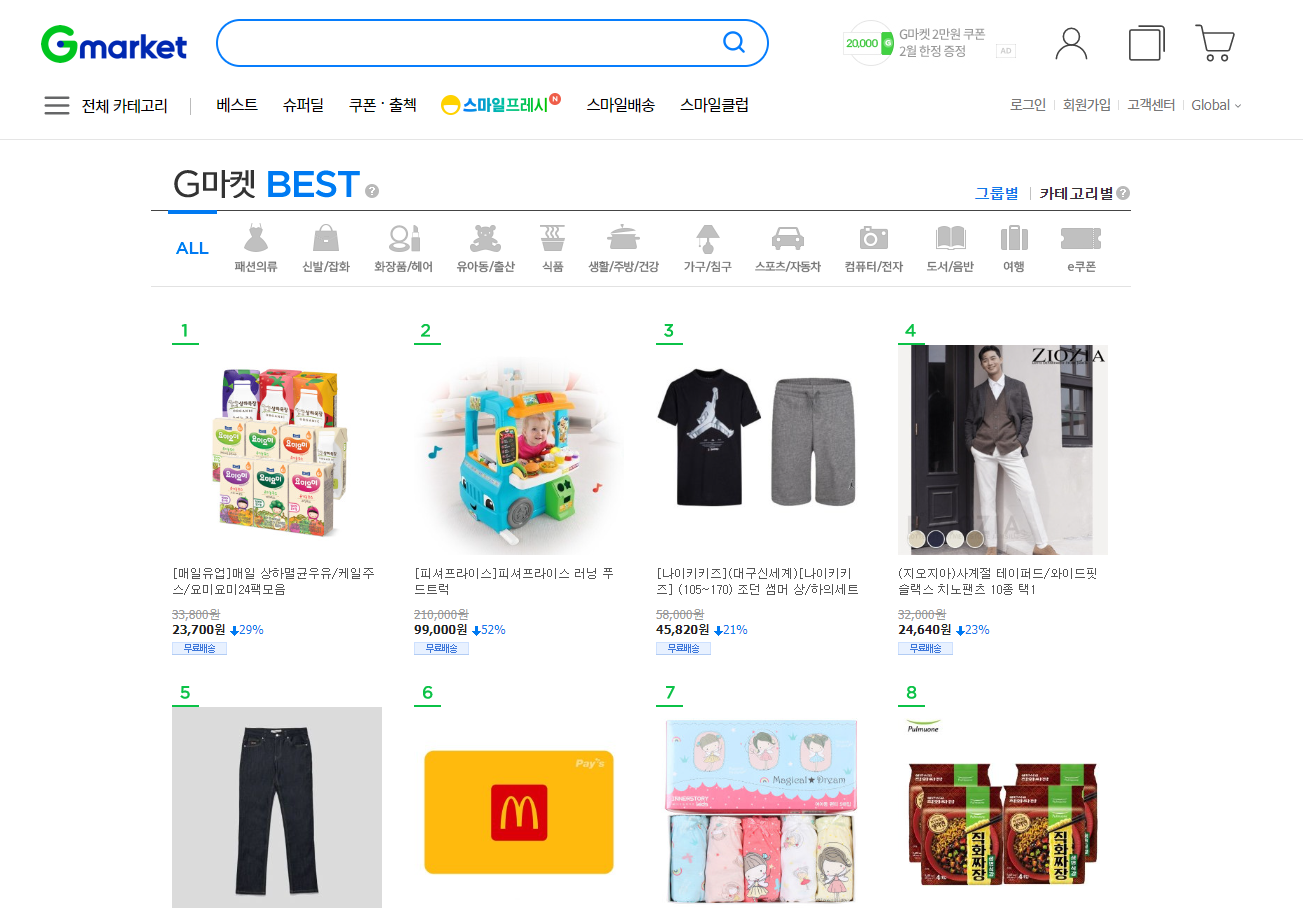

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

#### 1. URL 찾기

#### 강사님이 지마켓을 좋아하시는 이유... 크롤링 전부 허용해준다 
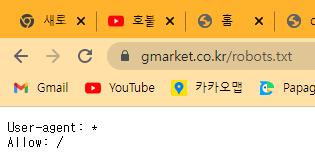

In [2]:
url = 'https://corners.gmarket.co.kr/bestsellers'

#### 2. request > response : str(html)

In [3]:
response = requests.get(url)
response

<Response [200]>

#### 3. bs > DataFrame

In [6]:
response.text[:500] # html을 가져오는 것을 알 수 있다

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\r\n<html lang="ko">\r\n<head>\r\n\t<title>G마켓 - G마켓 베스트</title>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge" />\r\n\t<meta http-equiv="content-type" content="text/html; charset=utf-8" />\r\n\t<meta http-equiv="content-style-type" content="text/css" />\r\n\t<meta http-equiv="content-script-type" content="text/javascript" />\r\n\t<meta http-equiv="imagetoolbar" content="no" />\r\n\t<meta id="viewport" name="'

In [7]:
dom = BeautifulSoup(response.text, 'html.parser')

In [8]:
dom

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<html lang="ko">
<head>
<title>G마켓 - G마켓 베스트</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="text/css" http-equiv="content-style-type"/>
<meta content="text/javascript" http-equiv="content-script-type"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="width=980" id="viewport" name="viewport"/>
<meta content="all" name="ROBOTS"/>
<meta content="인터넷쇼핑,오픈마켓,패션/뷰티,디지털,식품/유아,스포츠/자동차,생활용품,도서/DVD,여행/항공권,e쿠폰/티켓,만화/게임,공동구매,경매,중고,글로벌쇼핑,브랜드샵,베스트셀러,방문쇼핑몰,G스탬프,할인쿠폰,동영상,이벤트 등 G마켓" name="description"/>
<meta content="베스트100,베스트셀러,경매,할인쿠폰,베스트셀러,공동구매,컴퓨터/핸드폰,에어컨/TV/디카,MP3/게임,패션/명품/브랜드,여성의류/속옷,남성의류/정장/빅사이즈,분유/기저귀/식품/생리대/임부복,유아동/장난감,쌀/과일/한우/생선,건강식품/음료,화장품/자동차,스포츠/다이어트,골프/등산/스키/낚시,운동화,네비게이션,리빙/침구/인테리어,애완/성인/공구,꽃배달,도서/여행/항공권,만화" name="keywords"/>
<meta content="(주)이베이코리아" name="author"/>
<meta

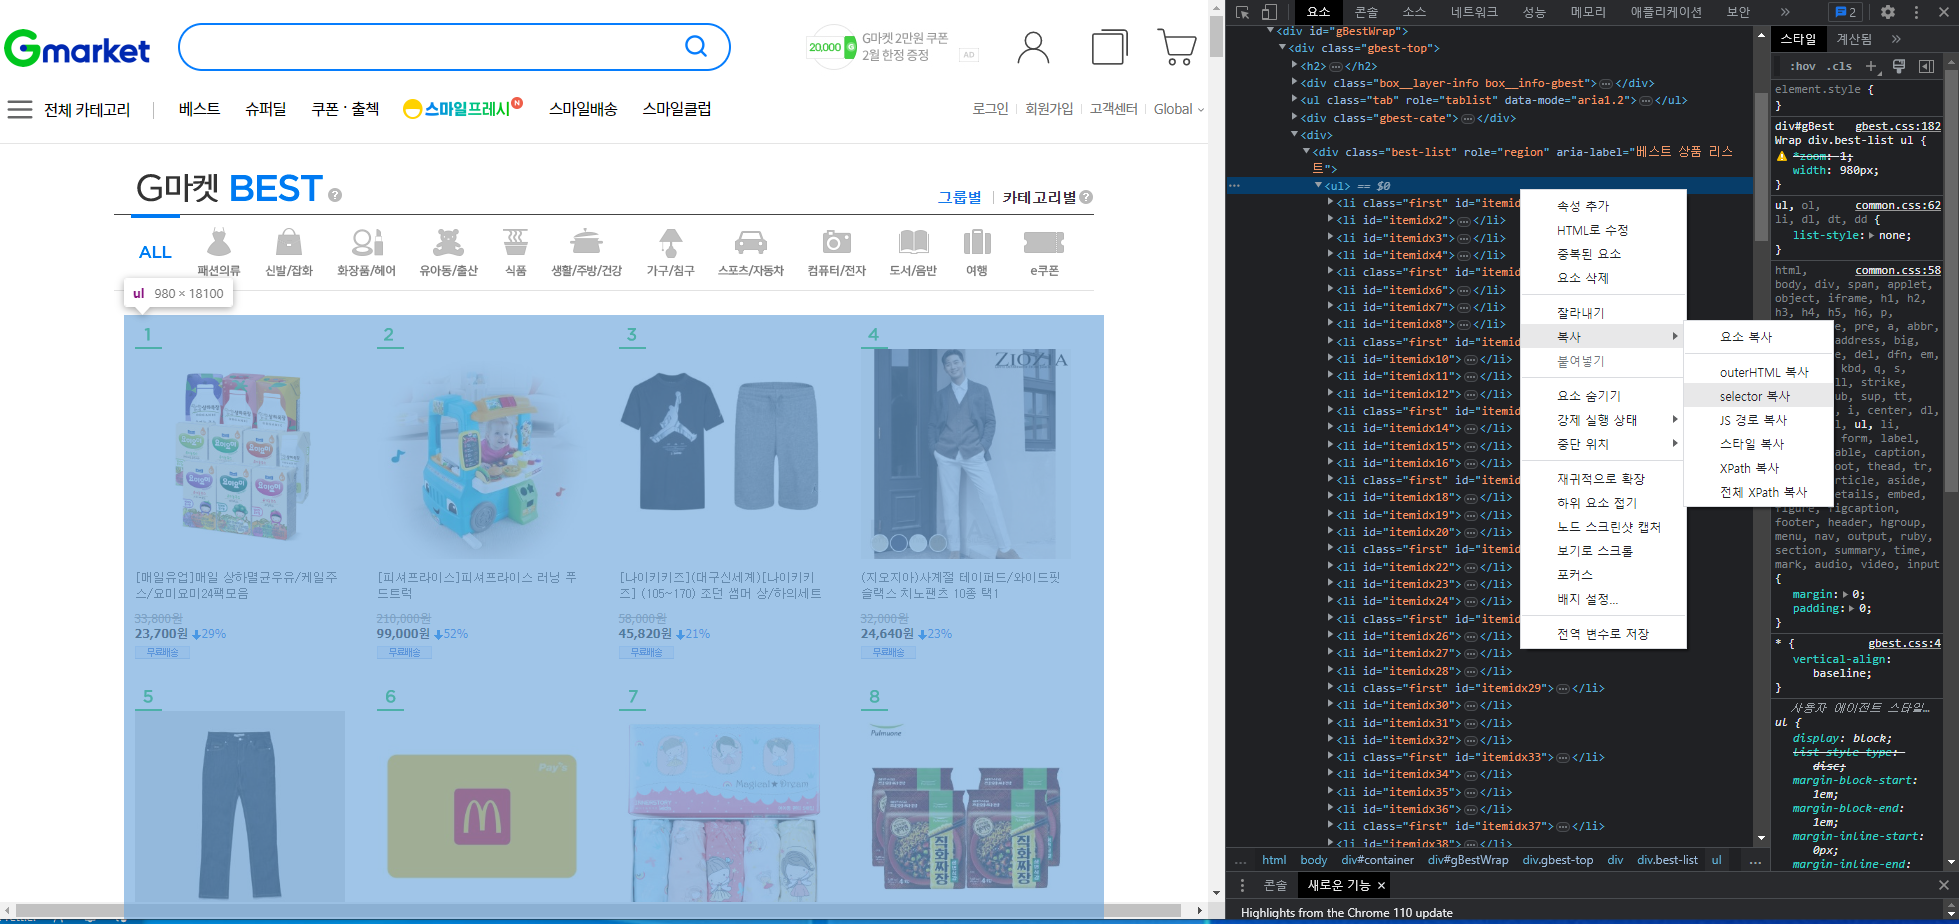

In [ ]:
# 가져오려는 데이터를 위해 개발자 도구 확인
#gBestWrap > div > div:nth-child(5) > div > ul > li

In [10]:
elements = dom.select('#gBestWrap > div > div:nth-child(5) > div > ul > li') # select와 select_one의 차이점을 꼭 알고 사용할 것
# 1차적으로 가지고 오려는 li element의 데이터 갯수를 확인해 보면 됨
len(elements)

200

In [11]:
# 2차적으로 원하는 데이터가 들어있는지 확인하면 위의 css 셀렉터가 잘못된건지 아닌지 알 수 있음
elements[0]

<li class="first" id="itemidx1">
<p class="no1" id="no1">1</p>
<div class="thumb">
<a href="http://item.gmarket.co.kr/Item?goodscode=2628342593&amp;ver=638122426488513744" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2628342593'}); setStorageItem('1','2628342593','200');"><img alt="[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음" class="lazy" data-original="//gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/></a>
</div>
<!--div class="goods-view">
									<a href="http://minishop.gmarket.co.kr/allmaeil"><span class="view">판매자 다른상품 보기</span>매일유업공식판매업체</a>
								</div-->
<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2628342593&amp;ver=638122426488513744" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2628342593'}); setStorageItem('1','2628342593','200');">[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음</a>
<div class="item_price">
<div class="o-price"><span class=

In [13]:
element = elements[0]

In [16]:
# 가져와야 하는 데이터 1개가 아닌 여러개임.. for문 돌려
data = {
  'title': element.select_one('.itemname').text, 
  'link': element.select_one('.itemname').get('href'), 
  'img': 'http:' + element.select_one('img').get('data-original'), 
  'o_price': element.select_one('.o-price').text, 
  's_price': element.select_one('.s-price').text.strip().split('\n')[0],
}
data
# 'title' : element.select_one('.itemname')까지만 하면 원하는 데이터의 태그 전체 가져오고, .text가 붙는 순간 그 사이의 텍스트 데이터만 가져옴
# .get('href')을 붙이면 href라는 속성을 가져오겠다라는 뜻
# 이미지 url을 보려고 하면 빈 이미지도 있음 >> 이미지가 없는 것... 이런 형태로 만드는 이유는 레이지 로드라고 하는데 
# 그 이유가 뭐냐면 만약 웹 페이지가 있는데 화면에는 상단의 일부만 보인다면 이미지 200개 중 페이지를 열때마다 서버에서 클라이언트로 이미지를 200개를 계속 로드를 하는 것임
# 보이지 않는데도 이미지를 계속 로드하면 데이터를 전송하는 네트워크 트래픽이 발생하겠죠? 첫번째 페이지 6개만 보이면 되는거고, 그 중에 하나만 보고 구매하고 나갈 수도 있는데 
# 굳이 나머지꺼를 다 불러와서 보여주면 네트워크 트래픽에 손해겠지 계속 낭비하는거지
# 네트워크 트래픽에 민감해 이미지 파일 용량이 커서 ㅇㅇ 그래서 스크롤이 발생할 때 서버에서 브라우저로 이미지가 보여지도록 설계가 되어있는 것이야.
# data-original = ''에 있는 게 진짜 찐 url이야... ㅠㅠ 이거 놓치면 안돼!! 이거 가져오면 찐 url 가져올 수 있어.
# 리스트 안에 딕셔너리 데이터가 선택되도록 적용하면 df로 만들기 편함..
# 프로토콜이 없다는 것은 이 페이지의 프로토콜을 따라서 쓰겠다는 의미임... http 사용하고 싶으면 'http' 추가해줘 ㅇㅇ 
# split 역슬래쉬 엔은 역슬래쉬엔을 기준으로 0, 1로 나뉘는데 리스트 형식이고 9% 말고 앞에 세일 가격을 보고 싶다면 0번째 선택 >> 확실한지 모르겠음 더 알아보기


{'title': '[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=2628342593&ver=638122426488513744',
 'img': 'http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714',
 'o_price': '정가33,800원',
 's_price': '할인가23,700원'}

In [14]:
element

<li class="first" id="itemidx1">
<p class="no1" id="no1">1</p>
<div class="thumb">
<a href="http://item.gmarket.co.kr/Item?goodscode=2628342593&amp;ver=638122426488513744" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2628342593'}); setStorageItem('1','2628342593','200');"><img alt="[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음" class="lazy" data-original="//gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/></a>
</div>
<!--div class="goods-view">
									<a href="http://minishop.gmarket.co.kr/allmaeil"><span class="view">판매자 다른상품 보기</span>매일유업공식판매업체</a>
								</div-->
<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2628342593&amp;ver=638122426488513744" onclick="pdsClickLog('200000680', 'Item', {'ASN': 1, 'goodsCode': '2628342593'}); setStorageItem('1','2628342593','200');">[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음</a>
<div class="item_price">
<div class="o-price"><span class=

In [33]:
data = []
for element in elements: # 아마 200번이 돌 거임
  data.append({
    'title': element.select_one('.itemname').text, 
    'link': element.select_one('.itemname').get('href'), 
    'img': 'http:' + element.select_one('img').get('data-original'), 
    'o_price': element.select_one('.o-price').text, 
    's_price': element.select_one('.s-price').text.strip().split('\n')[0],
  })
df = pd.DataFrame(data)
df.tail(2)  

,title,link,img,o_price,s_price
198,레인보우 중목 라인양말_10+10켤레 세트 (할인특가),http://item.gmarket.co.kr/Item?goodscode=27936...,http://gdimg.gmarket.co.kr/2793644100/still/30...,"정가43,000원","할인가12,900원"
199,[길벗스쿨]길벗스쿨_언어천재 말놀이 세트(본책9권+꾸러미북1권+스티커북1권+말놀이 ...,http://item.gmarket.co.kr/Item?goodscode=27917...,http://gdimg.gmarket.co.kr/2791705618/still/30...,"정가96,000원","할인가80,000원"


In [34]:
df[20:40] # 이렇게 비어있는 데이터는 정가로 파는 거임 할인 안하고 이런 것들을 원가 가격에 세일 가격을 넣어주는 작업을 해야 함

,title,link,img,o_price,s_price
20,[압타밀]압타밀 프로푸트라 HMO 2단계 800g x 6통 세트,http://item.gmarket.co.kr/Item?goodscode=25037...,http://gdimg.gmarket.co.kr/2503772943/still/30...,,"할인가199,000원"
21,[도루코]베이직 파스텔 주방가위 1+1특가(색상랜덤) + 집게증정 /우수한절삭력,http://item.gmarket.co.kr/Item?goodscode=21508...,http://gdimg.gmarket.co.kr/2150845686/still/30...,,"할인가7,900원"
22,[일동후디스]후디스 아이음료 과자 모음전,http://item.gmarket.co.kr/Item?goodscode=22631...,http://gdimg.gmarket.co.kr/2263121320/still/30...,"정가25,100원","할인가17,600원"
23,도드람한돈 생 삼겹살 500g 구이용,http://item.gmarket.co.kr/Item?goodscode=14907...,http://gdimg.gmarket.co.kr/1490710179/still/30...,,"할인가11,800원"
24,[구글플레이]기프트코드 5만원 / 구글 기프트카드,http://item.gmarket.co.kr/Item?goodscode=16552...,http://gdimg.gmarket.co.kr/1655242060/still/30...,"정가50,000원","할인가47,500원"
25,[닥터지]닥터지 블랙 스네일 달팽이크림 50ml 1+1_A005956,http://item.gmarket.co.kr/Item?goodscode=27324...,http://gdimg.gmarket.co.kr/2732477762/still/30...,"정가26,300원","할인가24,200원"
26,[오뚜기]오뚜기 가벼운참치 라이트스탠다드 135GX12개,http://item.gmarket.co.kr/Item?goodscode=25534...,http://gdimg.gmarket.co.kr/2553487898/still/30...,"정가29,900원","할인가27,900원"
27,아침이슬사과 22년 햇 부사 가정용 중대과 4.5kg(22과내),http://item.gmarket.co.kr/Item?goodscode=26129...,http://gdimg.gmarket.co.kr/2612939665/still/30...,"정가15,470원","할인가10,900원"
28,쌈빡김치 국내산 100% 전라도 파김치 1kg,http://item.gmarket.co.kr/Item?goodscode=27851...,http://gdimg.gmarket.co.kr/2785125457/still/30...,"정가15,000원","할인가10,000원"
29,[풀무원]로스팅짜장 라면 4봉(파기름2봉+고추기름2봉),http://item.gmarket.co.kr/Item?goodscode=23756...,http://gdimg.gmarket.co.kr/2375673537/still/30...,"정가10,000원","할인가9,400원"


In [35]:
# update : 데이터 선택 = 수정할 데이터
# df[df['o_price'] == ''] # 선택할 데이터 >> o_price가 비어있는 행만 가져옴
idx = df[df['o_price'] == ''].index # o_price가 비어있는 행의 인덱스 가져를 가져와서 인덱스에 넣어줌
# df[df['s_price'].loc[idx]] # 수정할 데이터 >> o_price가 비어있는 행의 s_price
df['o_price'].loc[idx] = df['s_price'].loc[idx]
df[20:40]

,title,link,img,o_price,s_price
20,[압타밀]압타밀 프로푸트라 HMO 2단계 800g x 6통 세트,http://item.gmarket.co.kr/Item?goodscode=25037...,http://gdimg.gmarket.co.kr/2503772943/still/30...,"할인가199,000원","할인가199,000원"
21,[도루코]베이직 파스텔 주방가위 1+1특가(색상랜덤) + 집게증정 /우수한절삭력,http://item.gmarket.co.kr/Item?goodscode=21508...,http://gdimg.gmarket.co.kr/2150845686/still/30...,"할인가7,900원","할인가7,900원"
22,[일동후디스]후디스 아이음료 과자 모음전,http://item.gmarket.co.kr/Item?goodscode=22631...,http://gdimg.gmarket.co.kr/2263121320/still/30...,"정가25,100원","할인가17,600원"
23,도드람한돈 생 삼겹살 500g 구이용,http://item.gmarket.co.kr/Item?goodscode=14907...,http://gdimg.gmarket.co.kr/1490710179/still/30...,"할인가11,800원","할인가11,800원"
24,[구글플레이]기프트코드 5만원 / 구글 기프트카드,http://item.gmarket.co.kr/Item?goodscode=16552...,http://gdimg.gmarket.co.kr/1655242060/still/30...,"정가50,000원","할인가47,500원"
25,[닥터지]닥터지 블랙 스네일 달팽이크림 50ml 1+1_A005956,http://item.gmarket.co.kr/Item?goodscode=27324...,http://gdimg.gmarket.co.kr/2732477762/still/30...,"정가26,300원","할인가24,200원"
26,[오뚜기]오뚜기 가벼운참치 라이트스탠다드 135GX12개,http://item.gmarket.co.kr/Item?goodscode=25534...,http://gdimg.gmarket.co.kr/2553487898/still/30...,"정가29,900원","할인가27,900원"
27,아침이슬사과 22년 햇 부사 가정용 중대과 4.5kg(22과내),http://item.gmarket.co.kr/Item?goodscode=26129...,http://gdimg.gmarket.co.kr/2612939665/still/30...,"정가15,470원","할인가10,900원"
28,쌈빡김치 국내산 100% 전라도 파김치 1kg,http://item.gmarket.co.kr/Item?goodscode=27851...,http://gdimg.gmarket.co.kr/2785125457/still/30...,"정가15,000원","할인가10,000원"
29,[풀무원]로스팅짜장 라면 4봉(파기름2봉+고추기름2봉),http://item.gmarket.co.kr/Item?goodscode=23756...,http://gdimg.gmarket.co.kr/2375673537/still/30...,"정가10,000원","할인가9,400원"


In [39]:
# re >> regist 정규표현식의 약자 레직스 철자 맞는지 모르겠음 
# +는 한개 이상. 한개 이상이 오는 데이터를 찾아라 결과가 리스트로 나오기 때문에 0번째 오는 것을 찾아라
# 콤마는 콤마를 기준점으로 뒤에있는 숫자를 가져올건지 말건지
import re
price = '할인가1,111,800원'
re.findall('[0-9,]+', price)[0]

'1,111,800'

In [40]:
# 가격 데이터에 숫자만 남겨두기! 정규표현식 이용해서
df['o_price'] = df['o_price'].apply(lambda price: re.findall('[0-9,]+', price)[0])
df['s_price'] = df['s_price'].apply(lambda price: re.findall('[0-9,]+', price)[0])
df.head(2)

,title,link,img,o_price,s_price
0,[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음,http://item.gmarket.co.kr/Item?goodscode=26283...,http://gdimg.gmarket.co.kr/2628342593/still/30...,"33,800","23,700"
1,[피셔프라이스]피셔프라이스 러닝 푸드트럭,http://item.gmarket.co.kr/Item?goodscode=19985...,http://gdimg.gmarket.co.kr/1998535842/still/30...,"210,000","99,000"


#### 4. download image